In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.graphing import *
pd.set_option('display.max_columns',None)

In [87]:
features = pd.read_csv('../data/training_set_values.csv')
labels = pd.read_csv('../data/training_set_labels.csv')
features['target'] = labels['status_group']

In [54]:
features = features[['management','target']]

In [119]:
import math
import matplotlib.pyplot as plt
import pandas as pd

def graph_categorical(df, column_array):

    fig, ax = plt.subplots(math.ceil(len(column_array)/2),1, figsize = (10,6), sharey = True)
    i = 0
    df_grouped = pd.DataFrame(df.groupby(column_array[i])['target'].value_counts(normalize=True)).unstack()
    df_grouped.plot.bar(ax = ax, stacked = False, color = ['blue','darkgoldenrod','red'])
    ax.get_legend()
    ax.set_xlabel('Management Type', fontsize = 20)
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
                tick.label.set_rotation('horizontal')
    handles, labels = ax.get_legend_handles_labels()
    plt.tight_layout()
    plt.subplots_adjust(top = .95)
    plt.suptitle('Percentages of Categories in Each Target', fontsize = 25, y=1.0)
    plt.figure(figsize = (6,6))
    fig.savefig('figures/target_by_management.png')

<ipython-input-120-0edc25bfbb8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.management[features.management.isin(public)] = 'public'
<ipython-input-120-0edc25bfbb8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.management[features.management.isin(private)] = 'private'


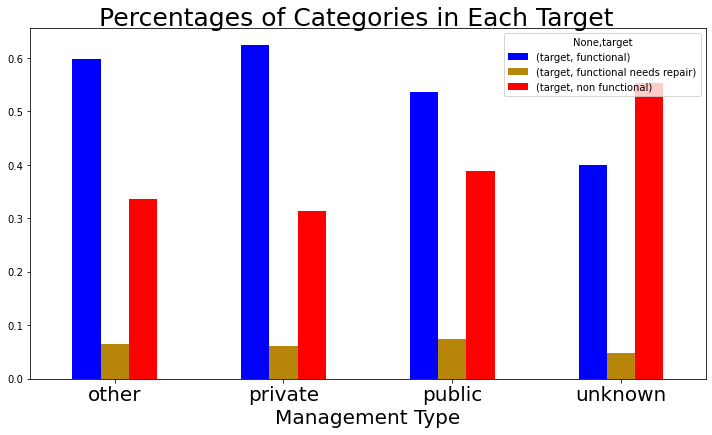

<Figure size 432x432 with 0 Axes>

In [120]:
features.management[features.management.isin(public)] = 'public'
features.management[features.management.isin(private)] = 'private'

graph_categorical(features,['management'])


In [55]:
public = ['vwc','wug','water board','wua','water authority','other - school','trust']
private = ['private operator','parastatal','company']

C:\Users\caell\new_Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


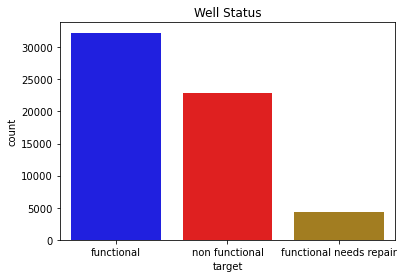

In [114]:
sns.countplot('target',data = features, palette = sns.set_palette(['blue','red','darkgoldenrod']))
plt.title('Well Status')
plt.savefig('figures/target_counts.png')